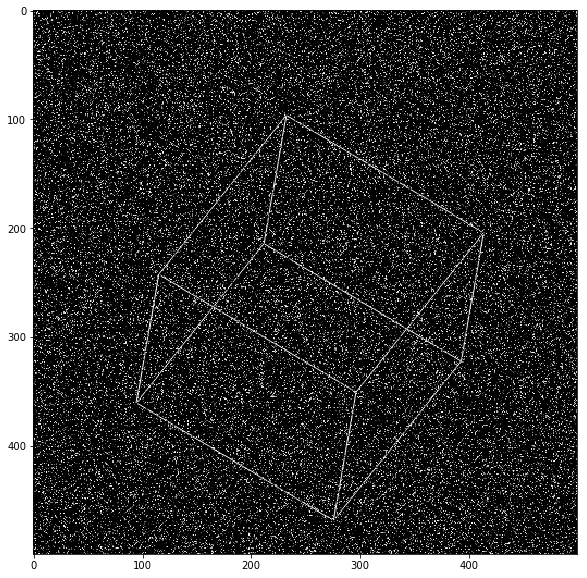

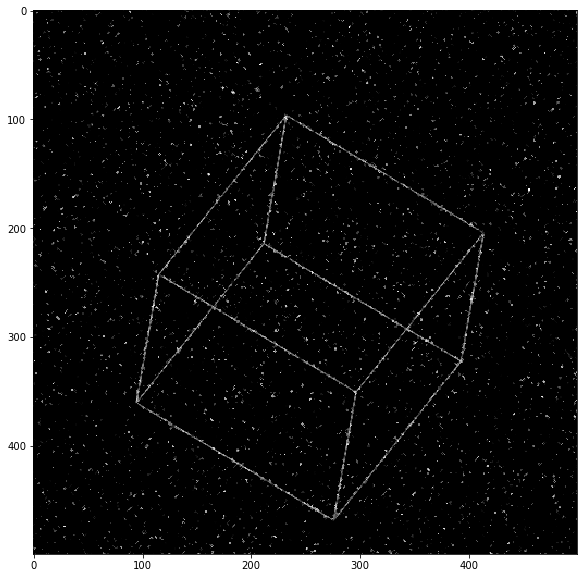

In [2]:
import pylab
import numpy as np
%matplotlib inline

data_folder = 'data/'

def read_pgm(filename):
    pgmf = open(filename, 'rb')
    
    """Return a raster of integers from a PGM as a list of lists."""
    bts = pgmf.read()[15:]
    
    raster = []
    for x in range(500):
        row = []
        for y in range(500):
            row.append(bts[x*500+y])
        raster.append(row)
    return raster

image = read_pgm('image.pgm')
pylab.figure(figsize=(10, 10))
pylab.imshow(image, cmap='gray')

def median_filter(image):
    med_image = np.zeros((500, 500))
    for y in range(500):
        for x in range(500):
            temp = []
            for dy in range(-1, 2):
                for dx in range(-1, 2):
                    if (x+dx>=0) and (x+dx<500) and (y+dy>=0) and (y+dy<500):
                        temp.append(image[y+dy][x+dx])
                        if dx==0 and dy==0:
                            temp.append(image[y+dy][x+dx])
                            temp.append(image[y+dy][x+dx])
            med_image[y, x] = np.median(temp)
    return med_image

def threshold_filter(image, threshold=0):
    thr_image = np.zeros_like(image)
    for y in range(500):
        for x in range(500):
            if image[y][x]<threshold:
                thr_image[y, x] = 0
            else:
                thr_image[y, x] = image[y][x]
    return thr_image

    
image = median_filter(image)
pylab.figure(figsize=(10, 10))
pylab.imshow(image, cmap='gray')

#image = median_filter(image)
#pylab.figure(figsize=(10, 10))
#pylab.imshow(image, cmap='gray')


#for i in range(10):
#    image = read_pgm(open(data_folder+'0.0/{}.pgm'.format(i), 'rb'))
#    pylab.figure()
#    pylab.imshow(image, cmap='gray')

In [23]:
import cv2

im = np.array(read_pgm('image.pgm'))
cv2.imshow('image', im)